In [14]:
import numpy as np
import os
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [2]:
train_folders_directory = 'drive/MyDrive/data/train/'
import os
print(os.listdir(train_folders_directory))

['close', 'open']


In [6]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

train_generator = train_datagen.flow_from_directory(
    directory=train_folders_directory,
    target_size=(227, 227),
    color_mode="rgb",
    batch_size=128,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=7
)

valid_generator = train_datagen.flow_from_directory(
    directory=train_folders_directory,
    target_size=(227, 227),
    color_mode="rgb",
    batch_size=128,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=7
)

Found 12000 images belonging to 2 classes.
Found 2998 images belonging to 2 classes.


In [7]:
def AlexNet():
  AlexNet = Sequential()
  AlexNet.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)))
  AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
  AlexNet.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
  AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
  AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
  AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
  AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
  AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
  AlexNet.add(Flatten())
  AlexNet.add(Dense(4096, activation='relu'))
  AlexNet.add(Dropout(0.5))
  AlexNet.add(Dense(4096, activation='relu'))
  AlexNet.add(Dropout(0.5))
  AlexNet.add(Dense(2, activation='softmax'))
  AlexNet.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
  return AlexNet

In [13]:
AlexNet().summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 384)       885120    
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 384)      

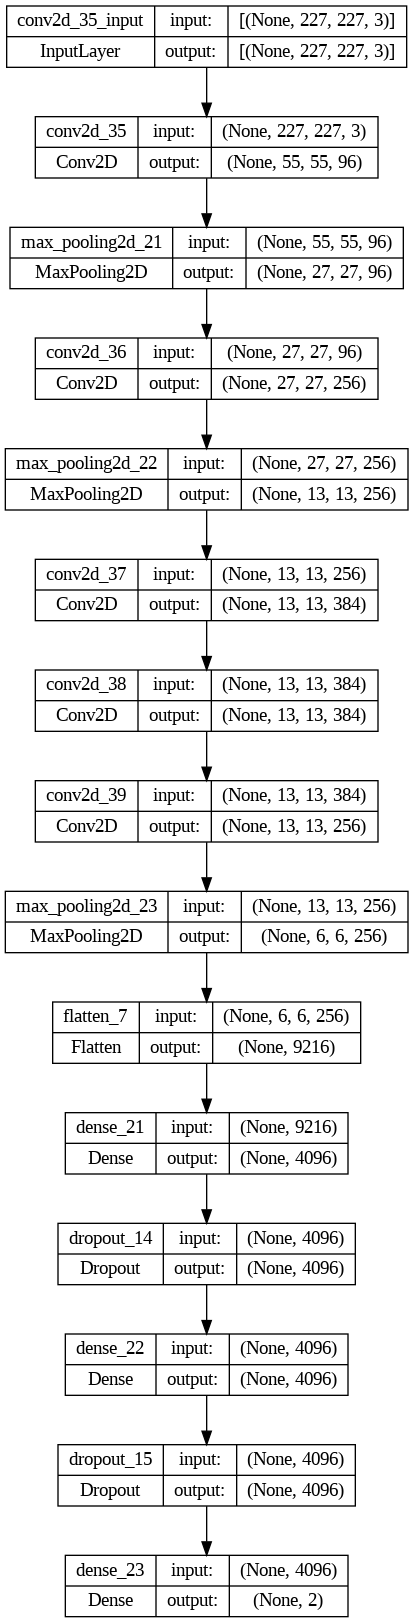

In [17]:
plot_model(AlexNet(), to_file='drive/MyDrive/AlexNet_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
AlexNet_model = AlexNet()
AlexNet_history = AlexNet_model.fit(train_generator, epochs=50, validation_data=valid_generator, shuffle=True, validation_steps=len(valid_generator),batch_size=32)

Epoch 1/50
94/94 [==============================] - 5314s 56s/step - loss: 0.8123 - accuracy: 0.6483 - val_loss: 0.9179 - val_accuracy: 0.5127
Epoch 2/50
94/94 [==============================] - 202s 2s/step - loss: 0.4154 - accuracy: 0.8239 - val_loss: 0.6313 - val_accuracy: 0.6901
Epoch 3/50
94/94 [==============================] - 202s 2s/step - loss: 0.2412 - accuracy: 0.8983 - val_loss: 0.5634 - val_accuracy: 0.7058
Epoch 4/50
94/94 [==============================] - 203s 2s/step - loss: 0.1902 - accuracy: 0.9240 - val_loss: 0.4318 - val_accuracy: 0.8125
Epoch 5/50
94/94 [==============================] - 203s 2s/step - loss: 0.1580 - accuracy: 0.9373 - val_loss: 0.4076 - val_accuracy: 0.8502
Epoch 6/50
94/94 [==============================] - 203s 2s/step - loss: 0.1193 - accuracy: 0.9562 - val_loss: 0.3566 - val_accuracy: 0.8462
Epoch 7/50
94/94 [==============================] - 201s 2s/step - loss: 0.1072 - accuracy: 0.9613 - val_loss: 0.3243 - val_accuracy: 0.8873
Epoch 8/50


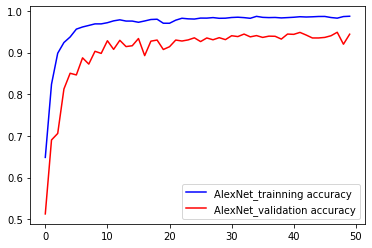

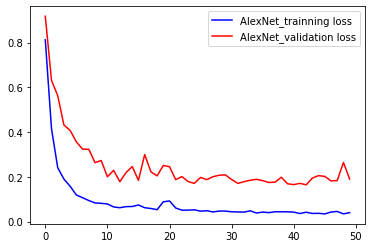

In [9]:
AlexNet_accuracy = AlexNet_history.history['accuracy']
AlexNet_val_accuracy = AlexNet_history.history['val_accuracy']
AlexNet_loss = AlexNet_history.history['loss']
AlexNet_val_loss = AlexNet_history.history['val_loss']
AlexNet_epochs = range(50)

plt.plot(AlexNet_epochs, AlexNet_accuracy, "b", label="AlexNet_trainning accuracy")
plt.plot(AlexNet_epochs, AlexNet_val_accuracy, "r", label="AlexNet_validation accuracy")
plt.legend()
plt.show()

plt.plot(AlexNet_epochs, AlexNet_loss, "b", label="AlexNet_trainning loss")
plt.plot(AlexNet_epochs, AlexNet_val_loss, "r", label="AlexNet_validation loss")
plt.legend()
plt.show()

In [10]:
AlexNet_model.save("drive/MyDrive/AlexNet.h5")
AlexNet_model.save("drive/MyDrive/AlexNet.model")